In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints

%load_ext autoreload
%autoreload 2

In [2]:
report_path = "/home/nicolasjudd/school_notes/neural/final_report/"
img_path = os.path.join(report_path, 'img')

In [3]:
def plot_normalized_response(u_init, res):
    fig, ax = plt.subplots(3,1)
    _ = ax[0].plot(u_init)
    _ = ax[0].set_title(f"Input: Len->{np.sum(u_init>0)} Peak->{np.max(u_init)}")

    udata = res.u[1]
    zu_data = (udata - np.average(udata))/np.std(udata)

    vdata = res.v[1]
    zv_data = (vdata - np.average(vdata))/np.std(vdata)

    _ = ax[1].plot(np.linspace(-zu_data.size//2, zu_data.size//2, zu_data.size), zu_data)
    _ = ax[1].set_title("Normalized U Immediate Response")

    _ = ax[2].plot(np.linspace(-zv_data.size//2, zv_data.size//2, zv_data.size), zv_data)
    _ = ax[2].set_title("Normalized V Immediate Response")

In [8]:
def plot_normalized_response(uinits, ress):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    _ = [ax[0].plot(u, label=f"Peak={max(u)}") for u in uinits]
    _ = ax[0].set_title(f"Input: Len->{np.sum(uinits[0]>0)}")

    _ = ax[1].set_title("Normalized U Immediate Response")
    _ = ax[2].set_title("Normalized V Immediate Response")
    for res, uinit in zip(ress, uinits):
        udata = res.u[1]
        zu_data = (udata - np.average(udata))/np.std(udata)

        vdata = res.v[1]
        zv_data = (vdata - np.average(vdata))/np.std(vdata)
        x_rang = np.linspace(-zu_data.size//2, zu_data.size//2, zu_data.size)
        
        _ = ax[1].plot(x_rang, zu_data, label=f"Normalized U Immediate Response <- Uinit Peak:{max(res.u[1])}")
        _ = ax[2].plot(x_rang, zv_data, label=f"Normalized V Immediate Response <- Uinit Peak:{max(res.v[1])}")
    
    return fig, ax
    # plt.legend()

In [9]:
# τ = 4.3
# τe = 1
# τi = τ * τe

# σ = 0.9  # 7.6625  # .6625
# σe = 1
# σi = σ* σe

# param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=3, k=1, size = 2**5, σ=np.array([σe,σi]))


# # u,v,cps = calc_nulclines_crosspoints(param, interp_prec=1e-5,
# #                                      fit_points=1_000,t_rang=(-100, 100))
# # _ = plt.plot(*u)
# # _ = plt.plot(*v)
# # _ = plt.scatter(*cps, c='r')
# # _ = plt.xlim(0, 10)
# # _ = plt.ylim(0, 10)
# # print(cps)

# # u_str = cps[0,1]
# # v_str = cps[1,1]

# u_str = 0
# v_str = 0

# u = u_str*np.ones(param.size).reshape((param.size,1))
# v = v_str*np.ones(param.size).reshape((param.size, 1))

# ii = param.size//2
# u[ii:ii+2**0] = 1
# # v[0:2**1] = 1

# #  inp = (u3, v3, u3, 0)

# inp = (u, v)

In [94]:
τ = 0.15
τe = 1
τi = τ * τe

σ = 0.85# 7.6625  # .6625
σe = 1
σi = σ* σe



A = np.array(( [1.5, 1]
              ,[0.5, 0.1]))
Θ = np.array([0.125, 0.4])

param = wcp.SSNDefaultParams(τ = np.array([τe, τi]), n=3, k=1
                             , size = 2**9+1, σ=np.array([σe,σi])
                            ,A=A, Θ=Θ)


def make_input(intensity, exp, off):
    u = np.zeros(param.size).reshape((param.size,1))
    v = np.zeros(param.size).reshape((param.size, 1))
    
    ii = param.size//2
    u[ii-2**exp + off:ii+2**exp+1 - off] = intensity
    return (u, v)

intensities = np.linspace(0.1, 1, 10)
inps = [make_input(i, exp=5, off=0) for i in intensities]
uinits = [u for (u, _) in inps]

ress = list()
for inp in inps:
    trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)

    end = 20
    step = 1/15
    res = trv_wav((0, end), t_eval=np.arange(0, end, step))

    # print(res._solved.message)
    ress.append(res)


# fig = plt.figure()
# _ = plt.imshow(res.u.T, vmin=0, vmax=1)

/tmp/ipykernel_132810/1308063883.py:13: RuntimeWarning: invalid value encountered in divide
  zv_data = (vdata - np.average(vdata))/np.std(vdata)


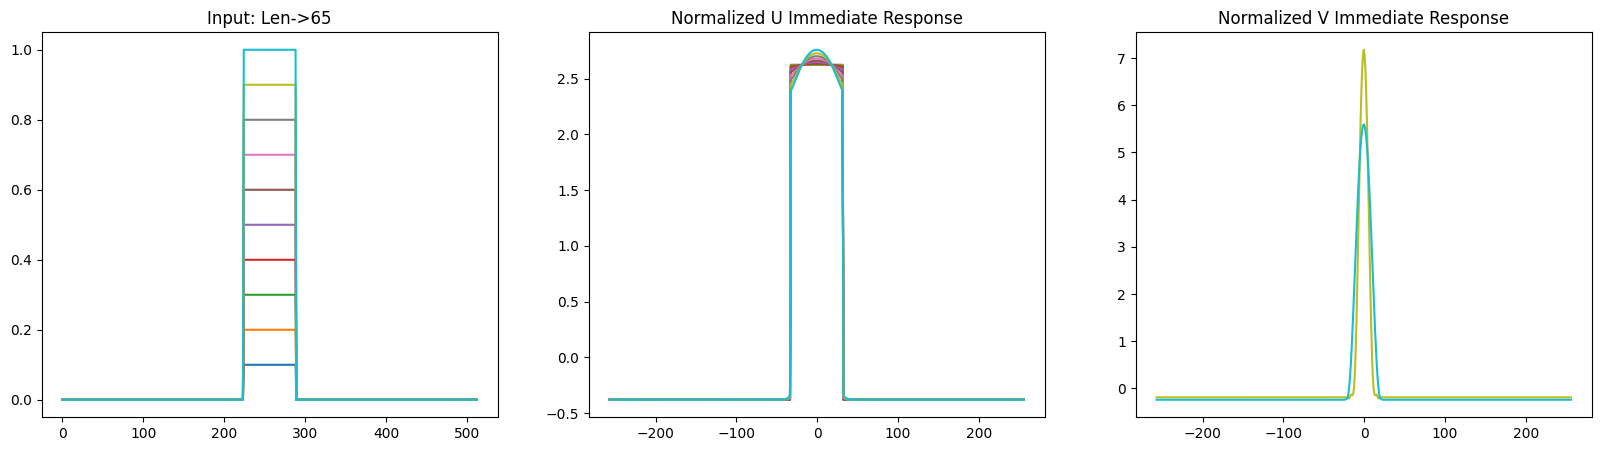

In [95]:
fig, ax = plot_normalized_response(uinits, ress)
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_normalized_graph.png')
#             ,bbox_inches='tight')

In [96]:
# gen = zip(uinits, ress)

In [97]:
# u, r = next(gen)
# plot_normalized_response(u, r)

In [98]:
# data = np.average(res.u, axis=0)
# zdata = (data - np.average(data))/np.std(data)
# _ = plt.plot(zdata)


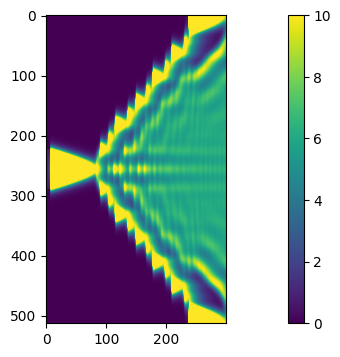

In [99]:
fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u.T, vmin=0, vmax=10)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

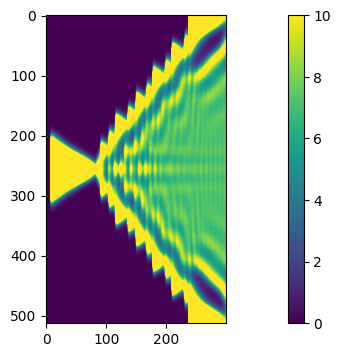

In [100]:
fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.v.T, vmin=0, vmax=10)
_ = plt.colorbar()
# plt.savefig(os.path.join(img_path, f'ssn1d_sig={σ}_tau={τ}_max_intensity_display_graph.png')
#                         ,bbox_inches='tight')

In [506]:
_ = plt.plot(res.t, res.u[:, param.size])

IndexError: index 300 is out of bounds for axis 1 with size 65